# Creating data

In [1]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.colors
import matplotlib.pyplot as plt
import torch

In [2]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4)

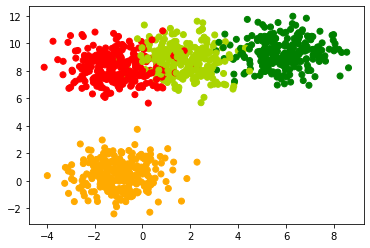

In [3]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)

In [4]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels)

In [5]:
X_train, X_val, Y_train, Y_val = map(torch.from_numpy, (X_train, X_val, Y_train, Y_val))

## Using Linear, Optim, Sequential functions from nn

In [6]:
from torch import optim
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class FirstNetwork_v2(nn.Module):
  def __init__(self):
    super().__init__()
    self.net = nn.Sequential(
        nn.Linear(2,2),
        nn.Sigmoid(),
        nn.Linear(2,4),
        nn.Softmax()
    )

  def forward(self, x):
    return self.net(x)


In [8]:
def fit_v2(x, y, model, opt, loss_fn, epochs = 1000):
  lo = []
  for epoch in range(epochs):
    loss = loss_fn(model(x), y)
    lo.append(loss.item())
    loss.backward()
    opt.step()
    opt.zero_grad()
    
  return lo

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


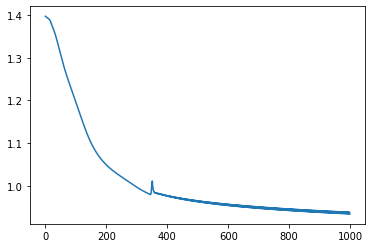

Loss before training : 1.3968976736068726
Loss after training : 0.9345694780349731


In [9]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
loss = fit_v2(X_train.float(), Y_train, fn, opt, loss_fn)
plt.plot(loss)
plt.show()
print("Loss before training : "+ str(loss[0]))
print("Loss after training : "+ str(loss[-1]))